<a href="https://colab.research.google.com/github/AdrianduPlessis/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

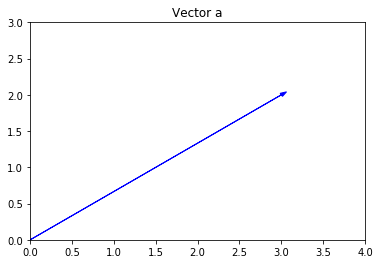

In [172]:
a = np.array([3, 2])
plt.arrow(0, 0, a[0], a[1], head_width =0.05, color = 'blue')
plt.xlim(0, 4)
plt.ylim(0, 3)
plt.title("Vector a")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [173]:
b  = np.array([17, -4, -2, 1])
b_norm = np.linalg.norm(b)
b_norm
#TODO Print

17.60681686165901

The norm of a vector represents its length or magnitude

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [174]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

d.dot(c)
#TODO print pretty

42

These vectors are not orthogonal (perpendicular) since their dot product does not equal 0.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [175]:
E = np.array([[7,4, 2],
             [1,3,-1],
             [2,6,-4]])

E_inverse = np.linalg.inv(E)
E_transpose = E.T

#TODO Print Pretty
print(E_inverse)
print(E_transpose)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [176]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head(7)

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0
5,1450,6
6,1600,4


In [177]:
import statistics as stats

#TODO Make Pretty

#mean
print(np.mean(df.customers))
print(np.mean(df.snow))
#variance
print(stats.variance(df.customers))
print(stats.variance(df.snow))
#standard deviation
print(stats.stdev(df.customers))
print(stats.stdev(df.snow))

1135.7142857142858
2.7142857142857144
98761.90476190476
8.571428571428571
314.26406851866597
2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, it does not make sense to directly compare the variances of the number of customers and inches of snow, because they are measured in different units. This problem is further exacerbated by variance being in terms of unit of measure squared, which exponentiates the problem. Standard deviation would be a better metric of comparison, but normalization is what is really needed here.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [178]:
#print(np.cov(df))
df.cov() #not using print command because Colab displays better this way

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [179]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
#Isolate numerics
#TODO abstract by using numeric arguement!
X = df.iloc[:,1:].values

In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled = pd.DataFrame(scaler.transform(X), columns=list(df)[1:])

#reinsert non-numeric 'Country' column
#scaled.insert(0, "Country", df.Country)

scaled.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [206]:
from sklearn.decomposition import PCA

pca = PCA(2) #number of Principle Components to reduce to
pca.fit(scaled)
pca_df = pd.DataFrame(pca.transform(scaled), columns=['PC 1', 'PC 2'])

print(round(pca.explained_variance_ratio_[0]*100, 1), 'percent of the variance is explained by PCA 1\n',
     round(pca.explained_variance_ratio_[1]*100, 1), 'percent of the variance is explained by PCA 2\n',
     'accounting for a total of', round(pca.explained_variance_ratio_.sum()*100, 1), 'percent of the variance in the data.')

68.3 percent of the variance is explained by PCA 1
 24.9 percent of the variance is explained by PCA 2
 accounting for a total of 93.2 percent of the variance in the data.


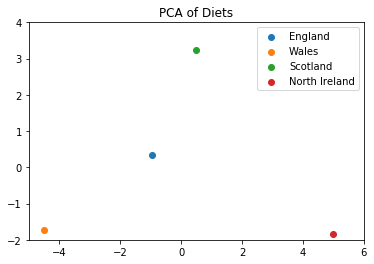

In [199]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(pca_df['PC 1'][0], pca_df['PC 2'][0], label=df.Country[0])
plt.scatter(pca_df['PC 1'][1], pca_df['PC 2'][1], label=df.Country[1])
plt.scatter(pca_df['PC 1'][2], pca_df['PC 2'][2], label=df.Country[2])
plt.scatter(pca_df['PC 1'][3], pca_df['PC 2'][3], label=df.Country[3])
plt.legend()
plt.title('PCA of Diets')
plt.xlim(-5,6)
plt.ylim(-2,4)

plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [185]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


###Data exploration

In [186]:
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


In [0]:
from sklearn.cluster import KMeans

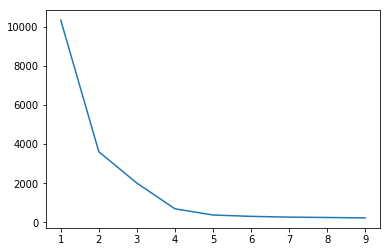

In [188]:
#Elbow graph
distortions = []
k = range(1,10)
#fit a model from 1 to 10 clusters, and plot it to view inflections
for i in k:
  k_model = KMeans(n_clusters=i).fit(points)
  distortions.append(k_model.inertia_)
  
plt.plot(k,distortions)
plt.show()

The elbow occurs at 4 clusters

In [0]:
#train and fit a model with n_clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)


#add a new column with the cluster labels
points['clusters'] = kmeans.labels_

In [190]:
points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


In [0]:
# Plotting clusters function from lecture, why reinvent the wheel
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'blue', 3:'yellow'}
  fig, ax = plt.subplots()
  plt.title('k-means clustering')
  
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', 
               label=key, color=colors[key])
  plt.show()

def get_centroids(df,column):
  return df.groupby(column).mean()

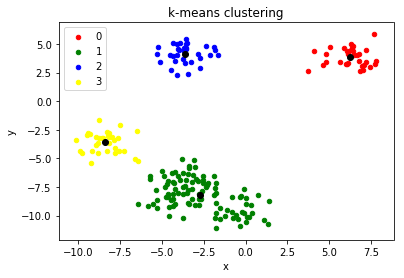

In [192]:
centroids = get_centroids(points, "clusters")
centroids
plot_clusters(points, "clusters" ,centroids)